In [87]:
# To optimize a users portfolio using the Efficient Frontier & Python.
# Import the python libraries

import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")


In [88]:
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df

AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              16.39              13.39              13.18   
2020-07-28              16.48              13.43              13.18   
2020-07-29              16.52              13.45              13.20   
2020-07-30              16.46              13.44              13.19   
2020-07-31              16.45              13.43              13.19   

            AMRCGRF HK Equity  AMRSGRF HK Equity  AMINAGP HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              18.00              14.95            11.6316   
2020-07-28              18.12              15.01            11.6361   
2020-07-29              18.17              15.04            11.6509   
2020-07-30              18.08              15.00            11.6548   
2020-07-31              18.05              15.00            11.6575   

            AMINASF HK Equity  AMINCAA HK Equity  AMINEUF HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27            17.4413            12.0733            14.6092   
2020-07-28            17.6109            12.0575            14.6926   
2020-07-29            17.5575            12.1054            14.6512   
2020-07-30            17.6800            12.0709            14.3242   
2020-07-31            17.5798            12.0833            14.2983   

            AMIGBOF HK Equity  AMIHKCF HK Equity  AMIMCOF HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27            11.4594            16.7664            10.1914   
2020-07-28            11.4906            16.9794            10.1913   
2020-07-29            11.4927            17.0443            10.1913   
2020-07-30            11.5174            16.9541            10.1913   
2020-07-31            11.5579            16.9242            10.1910   

            AMIT18R HK Equity  AMIT28R HK Equity  AMIT38R HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN   

In [89]:
df.shape

(5053, 16)

In [90]:
df.info()
#6 - AMINAGP HK Equity and  8 - AMINCAA HK Equity have only 684 non-null. 5 - AMRSGRF HK Equity has only 189 non-null.
#Others are similar - about 2600 entries.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2000-12-01 to 2020-07-31
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AMRCBLF HK Equity  2617 non-null   float64
 1   AMRCASF HK Equity  2617 non-null   float64
 2   AMRDALF HK Equity  2617 non-null   float64
 3   AMRCGRF HK Equity  2617 non-null   float64
 4   AMRSGRF HK Equity  189 non-null    float64
 5   AMINAGP HK Equity  684 non-null    float64
 6   AMINASF HK Equity  2617 non-null   float64
 7   AMINCAA HK Equity  684 non-null    float64
 8   AMINEUF HK Equity  2617 non-null   float64
 9   AMIGBOF HK Equity  2617 non-null   float64
 10  AMIHKCF HK Equity  2617 non-null   float64
 11  AMIMCOF HK Equity  2617 non-null   float64
 12  AMIT18R HK Equity  2543 non-null   float64
 13  AMIT28R HK Equity  2617 non-null   float64
 14  AMIT38R HK Equity  2601 non-null   float64
 15  AMIT48R HK Equity  2617 non-null   float64
dtypes: flo

In [91]:
df.values

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan],
       ...,
       [16.52  , 13.45  , 13.2   , ..., 15.4267, 16.9526, 17.7882],
       [16.46  , 13.44  , 13.19  , ..., 15.3936, 16.8905, 17.6938],
       [16.45  , 13.43  , 13.19  , ..., 15.4083, 16.8911, 17.6765]])

In [92]:
df.describe()

AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
count        2617.000000        2617.000000        2617.000000   
mean           13.008781          11.435797          11.426458   
std             1.598254           0.745137           0.802417   
min             9.810000           9.800000           9.920000   
25%            11.770000          10.900000          10.640000   
50%            12.920000          11.370000          11.550000   
75%            14.280000          11.970000          12.030000   
max            16.810000          13.450000          13.230000   

       AMRCGRF HK Equity  AMRSGRF HK Equity  AMINAGP HK Equity  \
count        2617.000000         189.000000         684.000000   
mean           13.984215          13.985450          10.598258   
std             2.066649           0.574546           0.432762   
min             9.700000          12.150000          10.007900   
25%            12.400000          13.730000          10.243100   
50%            13.920000          14.080000          10.383500   
75%            15.670000          14.330000          10.984100   
max            19.050000          15.040000          11.657500   

       AMINASF HK Equity  AMINCAA HK Equity  AMINEUF HK Equity  \
count        2617.000000         684.000000        2617.000000   
mean           14.396799          11.066338          14.393210   
std             1.853161           0.444722           2.706996   
min             9.733800           9.605200           9.300800   
25%            13.115800          10.817950          11.604900   
50%            14.105300          11.021200          14.942800   
75%            15.579200          11.331800          16.687300   
max            18.494900          12.118300          19.560400   

       AMIGBOF HK Equity  AMIHKCF HK Equity  AMIMCOF HK Equity  \
count        2617.000000        2617.000000        2617.000000   
mean           10.355622          13.331739          10.022405   
std             0.312357           2.285998           0.044556   
min             9.620400           8.487900           9.998800   
25%            10.165100          11.657500          10.000700   
50%            10.311300          12.710800          10.007500   
75%            10.524900          15.375500          10.009500   
max            11.557900          19.268300          10.191400   

       AMIT18R HK Equity  AMIT28R HK Equity  AMIT38R HK Equity  \
count        2543.000000        2617.000000        2601.000000   
mean           12.211078          12.989095          13.801791   
std             1.050875           1.438767           2.009521   
min            10.043800          10.129000           9.929800   
25%            11.334550          11.795000          12.179600   
50%            12.222800          13.000500          13.709500   
75%            12.970400          14.150900          15.506900   
max            14.356300          15.928500          17.937800   

       AMIT48R HK Equity  
count        2617.000000  
mean           14.297824  
std             2.400255  
min             9.646900  
25%            12.429200  
50%            14.164300  
75%            16.229900  
max            19.455800

In [93]:
df.head

<bound method NDFrame.head of             AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              16.39              13.39              13.18   
2020-07-28              16.48              13.43              13.18   
2020-07-29              16.52              13.45              13.20   
2020-07-30              16.46              13.44              13.19   
2020-07-31              16.45              13.43              13.19   

            AMRCGRF HK Equity  AMRSGRF HK Equi

In [94]:
df.tail

<bound method NDFrame.tail of             AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
date                                                                  
2000-12-01                NaN                NaN                NaN   
2000-12-04                NaN                NaN                NaN   
2000-12-05                NaN                NaN                NaN   
2000-12-06                NaN                NaN                NaN   
2000-12-07                NaN                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              16.39              13.39              13.18   
2020-07-28              16.48              13.43              13.18   
2020-07-29              16.52              13.45              13.20   
2020-07-30              16.46              13.44              13.19   
2020-07-31              16.45              13.43              13.19   

            AMRCGRF HK Equity  AMRSGRF HK Equi

In [95]:
df.dtypes

AMRCBLF HK Equity    float64
AMRCASF HK Equity    float64
AMRDALF HK Equity    float64
AMRCGRF HK Equity    float64
AMRSGRF HK Equity    float64
AMINAGP HK Equity    float64
AMINASF HK Equity    float64
AMINCAA HK Equity    float64
AMINEUF HK Equity    float64
AMIGBOF HK Equity    float64
AMIHKCF HK Equity    float64
AMIMCOF HK Equity    float64
AMIT18R HK Equity    float64
AMIT28R HK Equity    float64
AMIT38R HK Equity    float64
AMIT48R HK Equity    float64
dtype: object

In [96]:
df.dropna(axis="index",how="all")

AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
date                                                                  
2010-04-05              11.08              10.54              10.13   
2010-04-06              11.20              10.60              10.15   
2010-04-07              11.21              10.57              10.13   
2010-04-08              11.21              10.57              10.13   
2010-04-09              11.24              10.58              10.14   
...                       ...                ...                ...   
2020-07-27              16.39              13.39              13.18   
2020-07-28              16.48              13.43              13.18   
2020-07-29              16.52              13.45              13.20   
2020-07-30              16.46              13.44              13.19   
2020-07-31              16.45              13.43              13.19   

            AMRCGRF HK Equity  AMRSGRF HK Equity  AMINAGP HK Equity  \
date                                                                  
2010-04-05              11.39                NaN                NaN   
2010-04-06              11.54                NaN                NaN   
2010-04-07              11.58                NaN                NaN   
2010-04-08              11.57                NaN                NaN   
2010-04-09              11.60                NaN                NaN   
...                       ...                ...                ...   
2020-07-27              18.00              14.95            11.6316   
2020-07-28              18.12              15.01            11.6361   
2020-07-29              18.17              15.04            11.6509   
2020-07-30              18.08              15.00            11.6548   
2020-07-31              18.05              15.00            11.6575   

            AMINASF HK Equity  AMINCAA HK Equity  AMINEUF HK Equity  \
date                                                                  
2010-04-05            11.7935                NaN            11.0679   
2010-04-06            11.9296                NaN            11.1473   
2010-04-07            11.9804                NaN            11.1465   
2010-04-08            11.9458                NaN            11.1507   
2010-04-09            12.0070                NaN            11.1041   
...                       ...                ...                ...   
2020-07-27            17.4413            12.0733            14.6092   
2020-07-28            17.6109            12.0575            14.6926   
2020-07-29            17.5575            12.1054            14.6512   
2020-07-30            17.6800            12.0709            14.3242   
2020-07-31            17.5798            12.0833            14.2983   

            AMIGBOF HK Equity  AMIHKCF HK Equity  AMIMCOF HK Equity  \
date                                                                  
2010-04-05            10.1219            11.3104             9.9998   
2010-04-06            10.1388            11.4125             9.9998   
2010-04-07            10.0975            11.4125             9.9998   
2010-04-08            10.0639            11.3053             9.9998   
2010-04-09            10.0841            11.3910             9.9998   
...                       ...                ...                ...   
2020-07-27            11.4594            16.7664            10.1914   
2020-07-28            11.4906            16.9794            10.1913   
2020-07-29            11.4927            17.0443            10.1913   
2020-07-30            11.5174            16.9541            10.1913   
2020-07-31            11.5579            16.9242            10.1910   

            AMIT18R HK Equity  AMIT28R HK Equity  AMIT38R HK Equity  \
date                                                                  
2010-04-05                NaN            11.0246                NaN   
2010-04-06                NaN            11.1061                NaN   
2010-04-07                NaN   

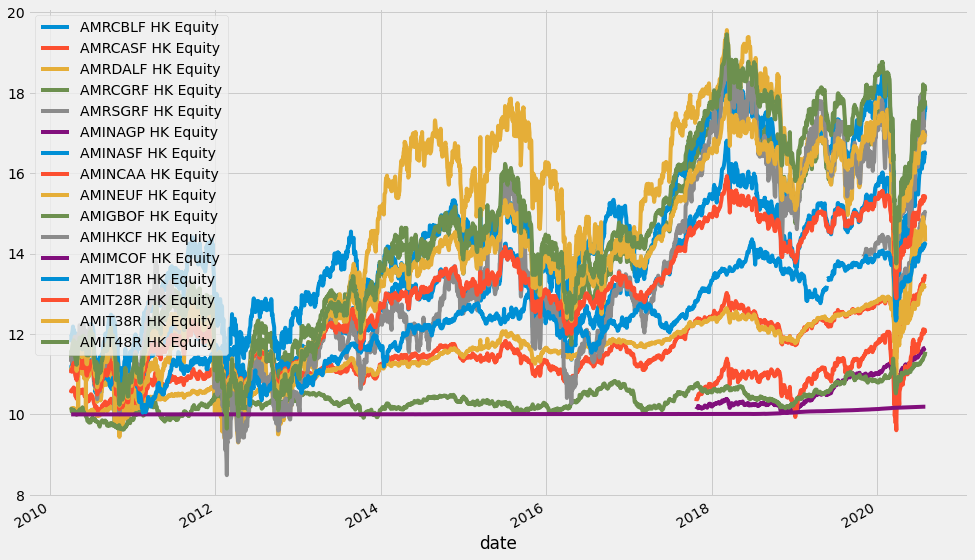

In [97]:
df.plot(figsize=(15,10))

In [98]:
df.std()

AMRCBLF HK Equity    1.598254
AMRCASF HK Equity    0.745137
AMRDALF HK Equity    0.802417
AMRCGRF HK Equity    2.066649
AMRSGRF HK Equity    0.574546
AMINAGP HK Equity    0.432762
AMINASF HK Equity    1.853161
AMINCAA HK Equity    0.444722
AMINEUF HK Equity    2.706996
AMIGBOF HK Equity    0.312357
AMIHKCF HK Equity    2.285998
AMIMCOF HK Equity    0.044556
AMIT18R HK Equity    1.050875
AMIT28R HK Equity    1.438767
AMIT38R HK Equity    2.009521
AMIT48R HK Equity    2.400255
dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

X = np.array(df["AMRCBLF HK Equity"])
y = np.array(df["AMRCASF HK Equity"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [100]:
#!pip install PyPortfolioOpt

In [101]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [102]:
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(df).ledoit_wolf()
S

AMRCBLF HK Equity  AMRCASF HK Equity  AMRDALF HK Equity  \
AMRCBLF HK Equity       1.152050e-02       4.958781e-03           0.003217   
AMRCASF HK Equity       4.958781e-03       2.771082e-03           0.001543   
AMRDALF HK Equity       3.216918e-03       1.543422e-03           0.010364   
AMRCGRF HK Equity       1.439527e-02       6.136865e-03           0.004086   
AMRSGRF HK Equity       1.388575e-03       6.480992e-04           0.000579   
AMINAGP HK Equity       6.980105e-04       3.789308e-04           0.000288   
AMINASF HK Equity       1.174977e-02       4.980941e-03           0.003561   
AMINCAA HK Equity       2.573743e-03       1.077846e-03           0.000973   
AMINEUF HK Equity       1.450004e-02       5.627600e-03           0.004191   
AMIGBOF HK Equity       1.969717e-04       5.144499e-04           0.000158   
AMIHKCF HK Equity       1.680794e-02       6.994509e-03           0.004621   
AMIMCOF HK Equity       5.009496e-07       7.035790e-07           0.000002   
AMIT18R HK Equity       1.083221e-03       5.295657e-04           0.000406   
AMIT28R HK Equity       8.175273e-03       3.556747e-03           0.002298   
AMIT38R HK Equity       1.056702e-02       4.447426e-03           0.002959   
AMIT48R HK Equity       1.305535e-02       5.380151e-03           0.003638   

                   AMRCGRF HK Equity  AMRSGRF HK Equity  AMINAGP HK Equity  \
AMRCBLF HK Equity       1.439527e-02       1.388575e-03       6.980105e-04   
AMRCASF HK Equity       6.136865e-03       6.480992e-04       3.789308e-04   
AMRDALF HK Equity       4.085953e-03       5.786689e-04       2.880178e-04   
AMRCGRF HK Equity       1.890105e-02       1.747596e-03       8.506925e-04   
AMRSGRF HK Equity       1.747596e-03       1.138786e-03       3.817821e-04   
AMINAGP HK Equity       8.506925e-04       3.817821e-04       4.754969e-04   
AMINASF HK Equity       1.508987e-02       1.595479e-03       6.721545e-04   
AMINCAA HK Equity       3.316175e-03       1.225183e-03       8.021902e-04   
AMINEUF HK Equity       1.935095e-02       2.172750e-03       1.057929e-03   
AMIGBOF HK Equity      -1.325922e-05       9.794823e-05       1.576122e-04   
AMIHKCF HK Equity       2.177163e-02       1.723158e-03       6.413722e-04   
AMIMCOF HK Equity       4.678262e-07       2.447462e-07       7.156192e-07   
AMIT18R HK Equity       1.334548e-03       6.369258e-04       2.769638e-04   
AMIT28R HK Equity       1.058066e-02       9.195063e-04       5.085065e-04   
AMIT38R HK Equity       1.377311e-02       1.215109e-03       6.341687e-04   
AMIT48R HK Equity       1.709608e-02       1.521235e-03       7.649247e-04   

                   AMINASF HK Equity  AMINCAA HK Equity  AMINEUF HK Equity  \
AMRCBLF HK Equity           0.011750       2.573743e-03           0.014500   
AMRCASF HK Equity           0.004981       1.077846e-03           0.005628   
AMRDALF HK Equity           0.003561       9.725065e-04           0.004191   
AMRCGRF HK Equity           0.015090       3.316175e-03           0.019351   
AMRSGRF HK Equity           0.001595       1.225183e-03           0.002173   
AMINAGP HK Equity           0.000672       8.021902e-04           0.001058   
AMINASF HK Equity           0.031975       2.518180e-03           0.018758   
AMINCAA HK Equity           0.002518       3.101280e-03           0.004414   
AMINEUF HK Equity           0.018758       4.413705e-03           0.038638   
AMIGBOF HK Equity           0.000723       4.158581e-05          -0.000028   
AMIHKCF HK Equity           0.020435       2.667511e-03           0.018551   
AMIMCOF HK Equity          -0.000002      -3.507296e-08          -0.000003   
AMIT18R HK Equity           0.001301       7.991650e-04           0.001504   
AMIT28R HK Equity           0.009727       1.769029e-03           0.012350   
AMIT38R HK Equity           0.012443       2.387778e-03           0.016240   
AMIT48R HK Equity           0.015263       3.031133e-03           0.020152   

                   AMIGBOF HK Equity  

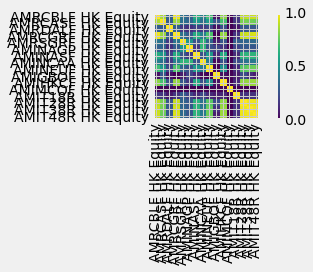

In [103]:
plotting.plot_covariance(S, plot_correlation=True);

In [104]:
#Calculate the expected returns and the annualised sample covariance matrix of daily asset returns.

from pypfopt.expected_returns import mean_historical_return
mu = mean_historical_return(df)
mu

AMRCBLF HK Equity    0.038802
AMRCASF HK Equity    0.023617
AMRDALF HK Equity    0.025753
AMRCGRF HK Equity    0.045350
AMRSGRF HK Equity    0.106415
AMINAGP HK Equity    0.053244
AMINASF HK Equity    0.039204
AMINCAA HK Equity    0.059571
AMINEUF HK Equity    0.024976
AMIGBOF HK Equity    0.012862
AMIHKCF HK Equity    0.039587
AMIMCOF HK Equity    0.001826
AMIT18R HK Equity    0.027979
AMIT28R HK Equity    0.032775
AMIT38R HK Equity    0.040590
AMIT48R HK Equity    0.042759
dtype: float64

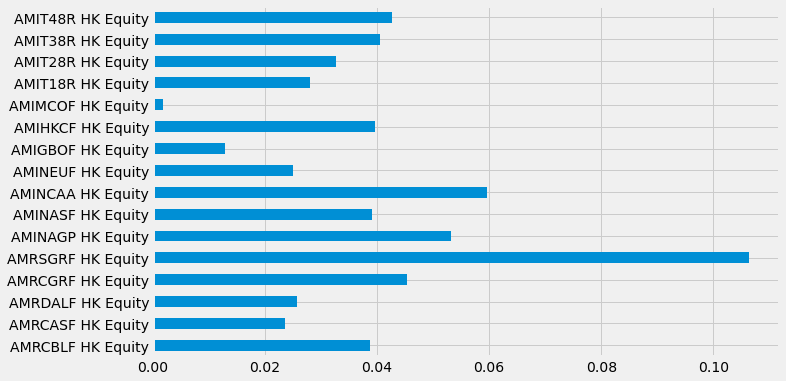

In [105]:
mu.plot.barh(figsize=(10,6))

In [106]:
#Optimize for maximal Sharpe ratio.
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)
list1 = np.array(ef.portfolio_performance(verbose=True))

OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMRSGRF HK Equity', 0.85372), ('AMINAGP HK Equity', 0.14628), ('AMINASF HK Equity', 0.0), ('AMINCAA HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMIMCOF HK Equity', 0.0), ('AMIT18R HK Equity', 0.0), ('AMIT28R HK Equity', 0.0), ('AMIT38R HK Equity', 0.0), ('AMIT48R HK Equity', 0.0)])
Expected annual return: 9.9%
Annual volatility: 3.1%
Sharpe Ratio: 2.57
Expected annual return: 9.9%
Annual volatility: 3.1%
Sharpe Ratio: 2.57


In [107]:
#!pip install pulp

In [108]:
#Input amount of your portfolio
#tpv = float(input("Amount of your portfolio:"))     #Interactive element hidden for now.

In [109]:
# Get discrete allocation of each MPF - how many shares of each asset you should purchase.
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)

cleaned_weights = ef.clean_weights()
weights = cleaned_weights 
#da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=tpv)     #Interactive element hidden for now.
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)     #Hide this if using input() function.
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'AMRSGRF HK Equity': 853, 'AMINAGP HK Equity': 189}
Funds remaining: $1.73


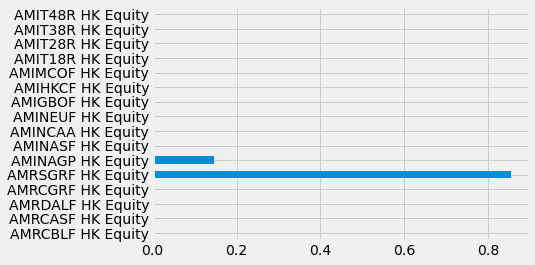

In [110]:
pd.Series(weights).plot.barh()

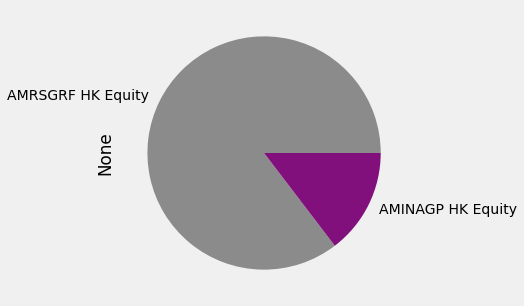

In [111]:
pd.Series(weights).plot.pie(figsize=(5,5))

In [112]:
# If your risk tolerance is higher, you can tell us what you expect and we can maximise your return!

In [113]:
#Input your risk tolerance.
#rt = float(input("Your Risk tolerance in decimals:"))     #Interactive element hidden for now.

In [136]:
ef = EfficientFrontier(mu, S)

#ef.efficient_risk(target_volatility=rt)           #Interactive element hidden for now.
ef.efficient_risk(target_volatility=0.1)           #Hide this when using input() function
weights = ef.clean_weights()
weights

OrderedDict([('AMRCBLF HK Equity', 0.0),
             ('AMRCASF HK Equity', 0.0),
             ('AMRDALF HK Equity', 0.0),
             ('AMRCGRF HK Equity', 0.0),
             ('AMRSGRF HK Equity', 1.0),
             ('AMINAGP HK Equity', 0.0),
             ('AMINASF HK Equity', 0.0),
             ('AMINCAA HK Equity', 0.0),
             ('AMINEUF HK Equity', 0.0),
             ('AMIGBOF HK Equity', 0.0),
             ('AMIHKCF HK Equity', 0.0),
             ('AMIMCOF HK Equity', 0.0),
             ('AMIT18R HK Equity', 0.0),
             ('AMIT28R HK Equity', 0.0),
             ('AMIT38R HK Equity', 0.0),
             ('AMIT48R HK Equity', 0.0)])

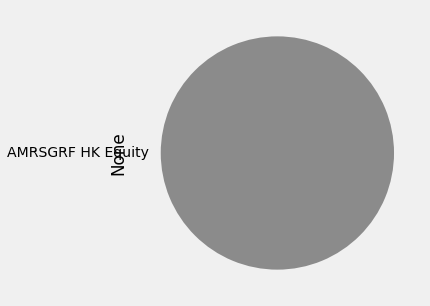

In [137]:
pd.Series(weights).plot.pie(figsize=(5,5))

In [138]:
ef.portfolio_performance(verbose=True)

Expected annual return: 10.6%
Annual volatility: 3.4%
Sharpe Ratio: 2.56


(0.10641453856062935, 0.03374590242924354, 2.56074167054262)

In [151]:
#for each number from 1 to 100, try them in the following function and plot all the outputs. 

for rt2 in range(10,40):
    rt2=rt2+1
    rt2 = rt2/1000
    ef.efficient_risk(target_volatility=rt2)
    weights = ef.clean_weights()
    matrix2 = np.matrix(ef.portfolio_performance(verbose=True))
    matrix2 = np.vstack((matrix2, matrix2))

print(matrix2)
        
    #store these performance in a matrix as columns. Use rt2 as index. 

Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0%
Sharpe Ratio: -0.03
Expected annual return: 2.0%
Annual volatility: 1.0

SyntaxError: 'return' outside function (<ipython-input-151-efc2ce945795>, line 12)

In [150]:
for rt2 in range(3):
    rt2 = rt2 + 1
    rt2 = rt2*3
    print(rt2)

3
6
9


In [124]:
matrix2

matrix([[0.09711453, 0.03      , 2.57048439],
        [0.09711453, 0.03      , 2.57048439]])

In [117]:
#anomaly detection - benchmark abnormal situations, find 